# Leaf statistics

Author: Melissa

[Github issue](https://github.com/astronomy-commons/lsdb/issues/550) - Enable inspection of catalog per leaf 



In [1]:
import lsdb

catalog = lsdb.read_hats("/home/delucchi/git/leaf/hats/tests/data/small_sky_nested")
catalog

,id,ra,dec,ra_error,dec_error,lc,Norder,Dir,Npix
npartitions=13,,,,,,,,,
"Order: 2, Pixel: 176",int64[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],int64[pyarrow],"struct<source_id: list<element: int64>, source...",int64[pyarrow],int64[pyarrow],int64[pyarrow]
"Order: 2, Pixel: 177",...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...
"Order: 2, Pixel: 187",...,...,...,...,...,...,...,...,...
"Order: 1, Pixel: 47",...,...,...,...,...,...,...,...,...


## Wrap the HATS catalog method

Implemented by wrapping the `aggregate_column_statistics` method that already exists on the HATS catalog.

The HATS method has been modified to:
- accept a list of pixels, and return statistics ONLY related to those pixels
- also return a column of the row count
  - NB: this is not the same as the total number of rows in the file, as nested columns will have more values
- removes the `".list.element"` suffix for nested column names

In [2]:
catalog.aggregate_column_statistics()

,min_value,max_value,null_count,row_count
column_names,,,,
id,700,830,0,131
ra,280.5,350.5,0,131
dec,-69.5,-25.5,0,131
ra_error,0,0,0,131
dec_error,0,0,0,131
lc.source_id,70000,87160,0,16135
lc.source_ra,280.50167438094974,351.0955564811893,0,16135
lc.source_dec,-69.49946137698012,-24.901268838630852,0,16135
lc.mjd,58363.28635615028,59562.86235105604,0,16135


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel density map - small_sky_nested'}>)

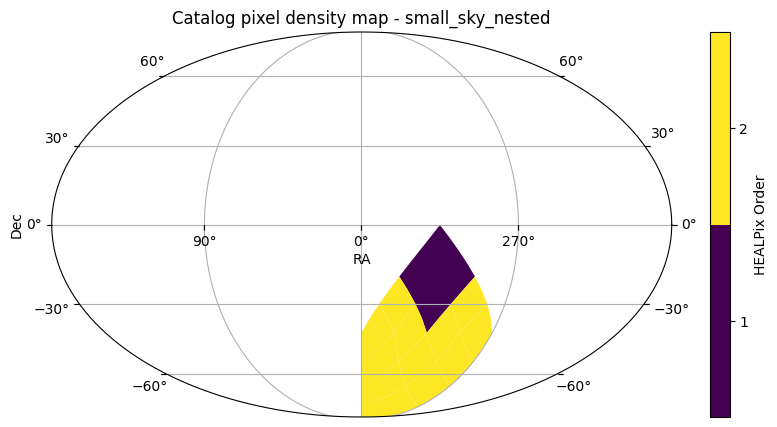

In [3]:
catalog.plot_pixels()

## Filtering the catalog

When you filter a catalog by some spatial filters, you will also filter to fewer partitions. Here, we perform a cone search on a catalog, and show the statistics being updated.

The ra and dec ranges are more limited, and the row counts are lower.

(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel density map - small_sky_nested'}>)

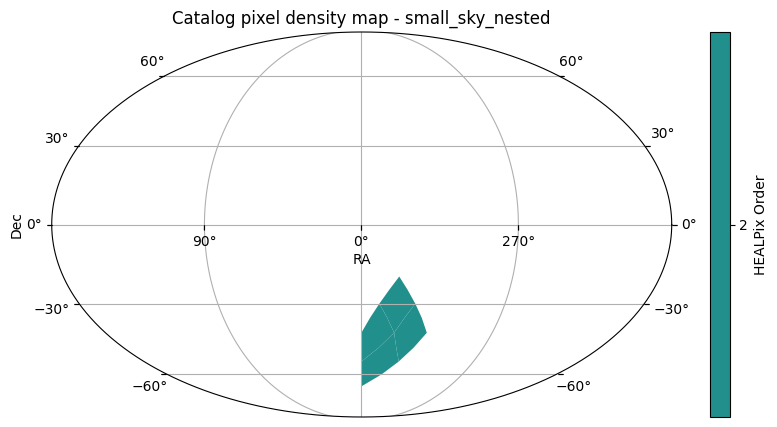

In [4]:
cone_search = catalog.cone_search(340, -40, 30_000, fine=False)
cone_search.plot_pixels()

In [5]:
cone_search.aggregate_column_statistics()

,min_value,max_value,null_count,row_count
column_names,,,,
id,704,828,0,29
ra,320.5,350.5,0,29
dec,-60.5,-25.5,0,29
ra_error,0,0,0,29
dec_error,0,0,0,29
lc.source_id,70003,87158,0,3671
lc.source_ra,320.50054375565173,351.0955564811893,0,3671
lc.source_dec,-60.49411628748686,-24.905916244508436,0,3671
lc.mjd,58363.58654698081,59562.63854998956,0,3671


## Explicit filters

You can, instead, use the full catalog, and indicate some explicit filters

- columns of interest (including nested columns)

In [6]:
## columns of interest (including nested columns)

catalog.aggregate_column_statistics(include_columns=["id", "ra", "dec", "lc.mjd", "lc.mag", "lc.band"])

,min_value,max_value,null_count,row_count
column_names,,,,
id,700,830,0,131
ra,280.5,350.5,0,131
dec,-69.5,-25.5,0,131
lc.mjd,58363.28635615028,59562.86235105604,0,16135
lc.mag,15.000127559957456,20.99969128807222,0,16135
lc.band,g,z,0,16135


In [7]:
## just one partition

catalog.aggregate_column_statistics(partition_index=1)

,min_value,max_value,null_count,row_count
column_names,,,,
id,733,826,0,11
ra,322.5,348.5,0,11
dec,-69.5,-57.5,0,11
ra_error,0,0,0,11
dec_error,0,0,0,11
lc.source_id,70007,87156,0,1441
lc.source_ra,322.507878001358,349.0975387490776,0,1441
lc.source_dec,-69.497647961622,-56.90145334656091,0,1441
lc.mjd,58363.80346032264,59562.48297082074,0,1441


In [8]:
## just a few partitions

catalog.aggregate_column_statistics(partition_index=[*range(1,4)])

,min_value,max_value,null_count,row_count
column_names,,,,
id,703,830,0,38
ra,283.5,348.5,0,38
dec,-69.5,-47.5,0,38
ra_error,0,0,0,38
dec_error,0,0,0,38
lc.source_id,70000,87156,0,4466
lc.source_ra,283.5007522366125,349.0975387490776,0,4466
lc.source_dec,-69.49946137698012,-47.36160555677071,0,4466
lc.mjd,58363.28635615028,59562.48297082074,0,4466
